In [1]:
#Importing Libraries

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle

In [3]:
#Loading and Understanding data

In [4]:
df=pd.read_csv("D:\Projects ML\Customer Churn Predictor Proj 8\customer_churn_data.csv")

In [5]:
df.shape

(7043, 21)

In [6]:
pd.set_option("display.max_columns",None) # If data i Truncated

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Dropping Cutomer ID Column (Not required)

In [10]:
df=df.drop(columns=['customerID'])

In [11]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [12]:
#Printing unique values

numerical_features_list=["tenure","MonthlyCharges","TotalCharges"]
for col in df.columns:
    if col not in numerical_features_list:
        print(col,df[col].unique())
        print('-'*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [13]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df[df['TotalCharges']==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
len(df[df['TotalCharges']==" "])

11

In [16]:
df['TotalCharges']=df['TotalCharges'].replace({" ":0.0})

In [17]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [19]:
# Checking the distribution of target column

In [20]:
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [21]:
#EDA

In [22]:
df.shape

(7043, 20)

In [23]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [24]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [25]:
#Numerical Features Analysis

In [26]:
def plot_hist(df,col_name):
    plt.figure(figsize=(5,3))
    sns.histplot(df[col_name],kde=True)
    plt.title(f"Distributions of {col_name}")
    
    #Calculate mean and median values of column
    col_mean=df[col_name].mean()
    col_median=df[col_name].median()

    #add vertical lines for mean and median
    plt.axvline(col_mean,color="red",linestyle="--",label="Mean")
    plt.axvline(col_median,color="green",linestyle="-",label="Median")

    plt.legend()

    plt.show()

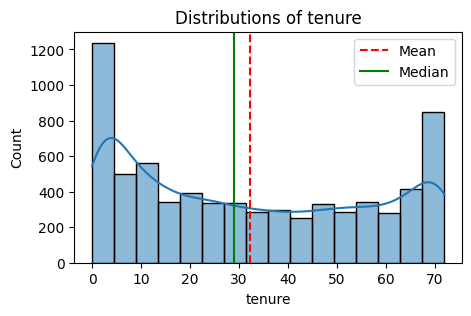

In [27]:
plot_hist(df,"tenure")

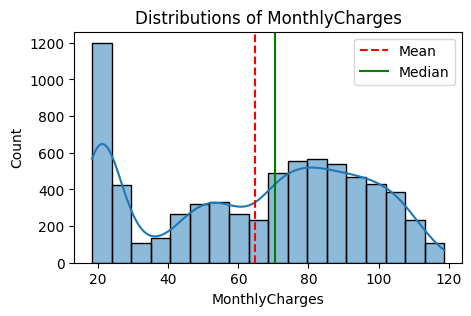

In [28]:
plot_hist(df,"MonthlyCharges")

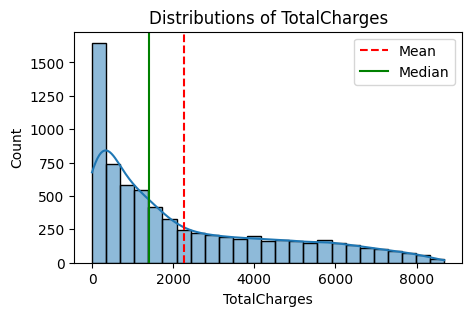

In [29]:
plot_hist(df,"TotalCharges")

In [30]:
def box_plot(df,col_name):
    plt.figure(figsize=(5,3))
    sns.boxplot(y=df[col_name])
    plt.title(f"Distributions of {col_name}")
    plt.ylabel(col_name)
    plt.show()

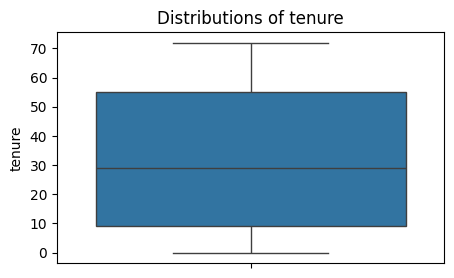

In [31]:
box_plot(df,"tenure")

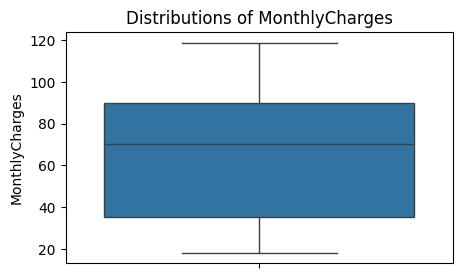

In [32]:
box_plot(df,"MonthlyCharges")

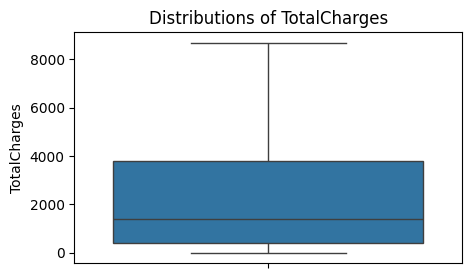

In [33]:
box_plot(df,"TotalCharges")

In [34]:
#Correlation Heatmap

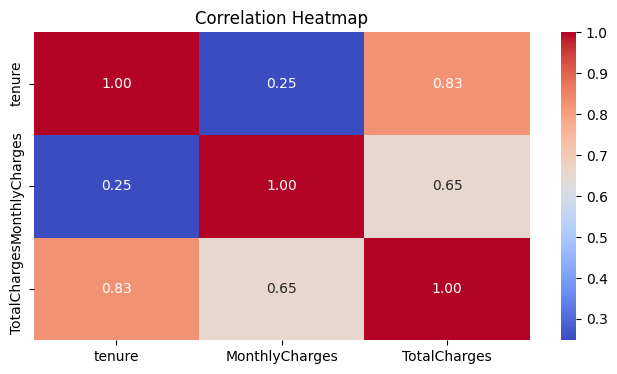

In [35]:
plt.figure(figsize=(8,4))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [36]:
#Categorical Features Analysis

In [37]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [39]:
object_col= df.select_dtypes(include="object").columns.to_list()
object_col=["SeniorCitizen"]+object_col


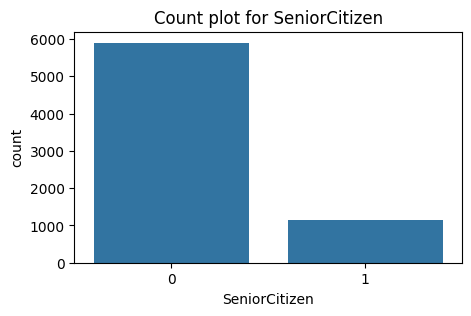

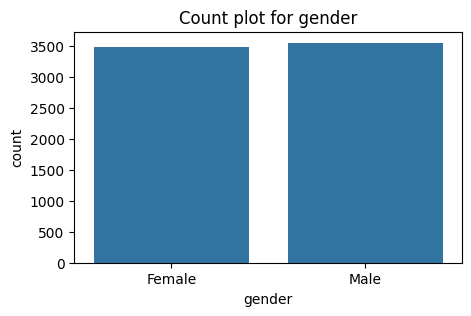

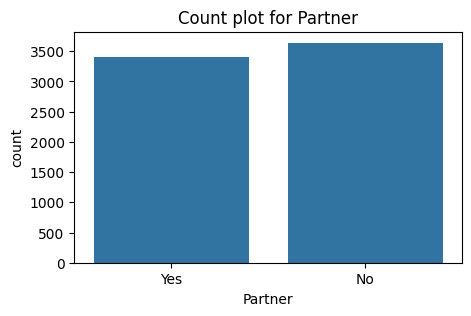

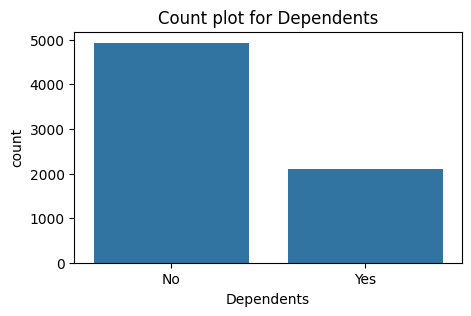

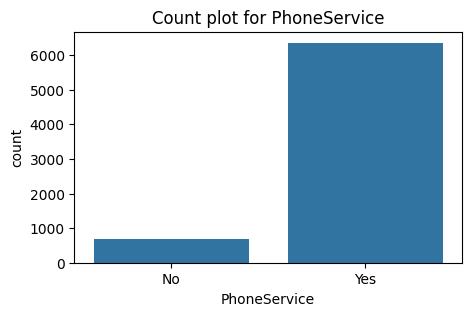

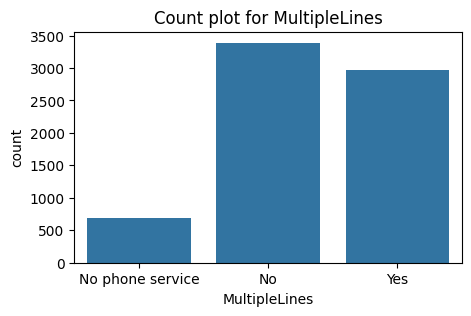

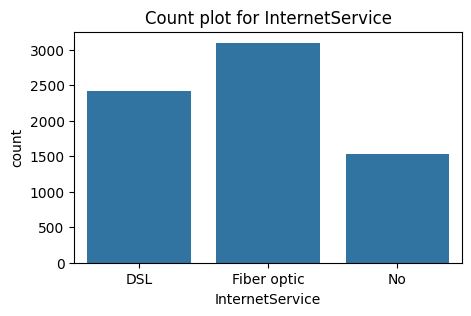

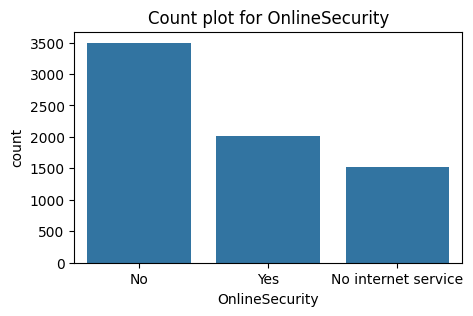

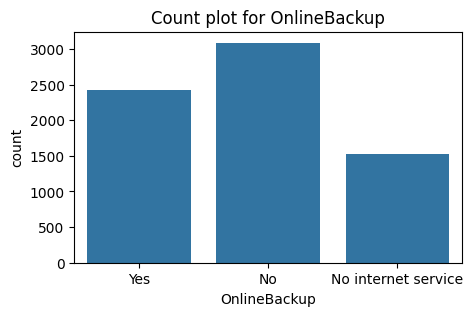

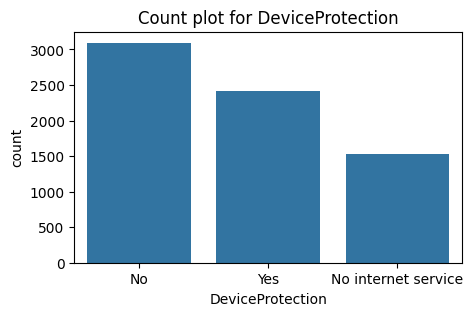

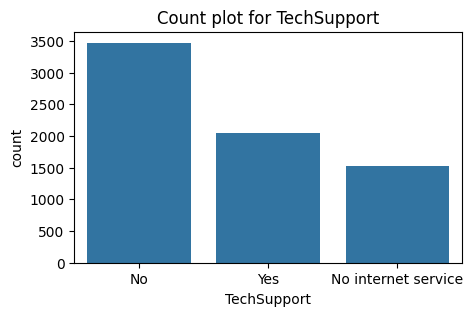

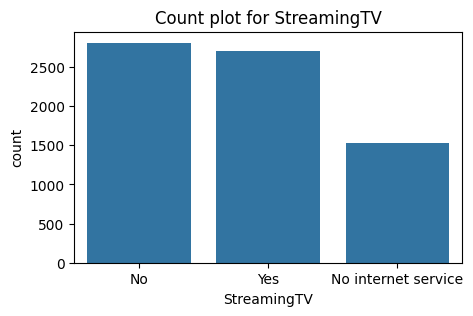

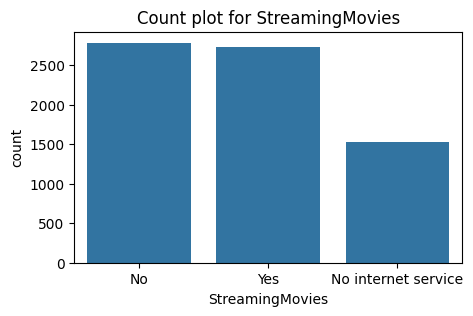

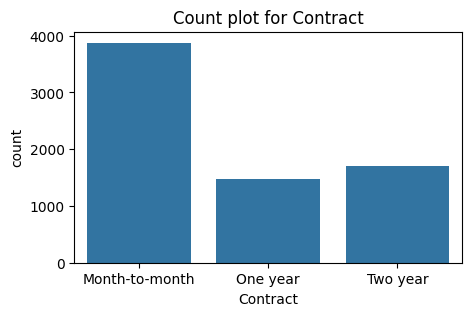

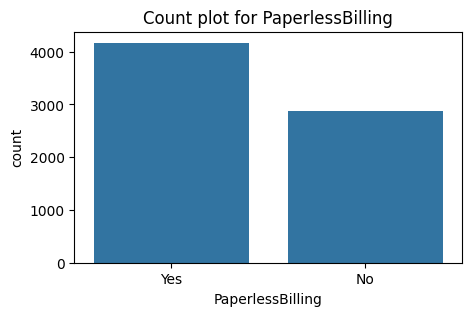

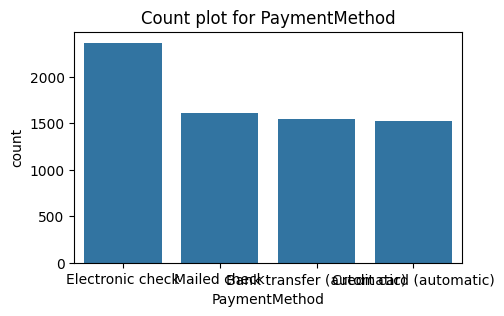

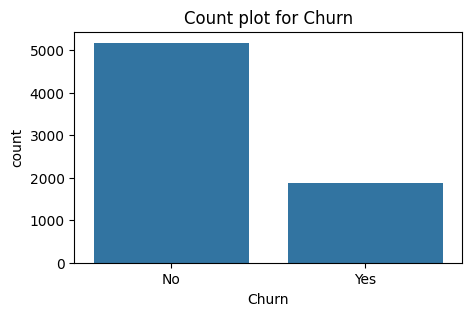

In [40]:
for col in object_col:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col])
    plt.title(f"Count plot for {col}")
    plt.show()

In [41]:
#Data preproceessing

In [42]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [44]:
#Lsbel Encoding of target column

In [45]:
df['Churn']=df['Churn'].replace({"Yes":1,"No":0})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22632\1419440389.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn']=df['Churn'].replace({"Yes":1,"No":0})


In [46]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [48]:
print(df['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [49]:
#Label Encoding of categorical Features

In [51]:
#Identifying column with object datatypes
obj_col=df.select_dtypes(include="object").columns.to_list()

In [52]:
print(obj_col)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [54]:
#Initialize dictionary to save the encoders
encode={}

#apply label encoding and store encoders

for col in obj_col:
    label_encoder=LabelEncoder()
    df[col]=label_encoder.fit_transform(df[col])
    encode[col]=label_encoder

#save the encoder to a pickle file
with open("encoders.pkl","wb") as f:
    pickle.dump(encode,f)

In [55]:
encode

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [56]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [57]:
#training and test data split

In [60]:
#splitting the features and target
x=df.drop(columns=["Churn"])
y=df["Churn"]

In [61]:
#split training and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [63]:
print(y_train.shape)

(5634,)


In [64]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


In [65]:
#SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE (SMOTE)

In [68]:
smote=SMOTE(random_state=42)
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [69]:
print(y_train_smote.shape)

(8276,)


In [70]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


In [71]:
#Model Training

In [72]:
#dictionary of models
models={
    "Decision Tree":DecisionTreeClassifier(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
    "XGBoost":XGBClassifier(random_state=42)
}

In [86]:
# Dictionary to store Cross Validation Researcch
cv_score={}

#perform 5-fold cross validation for each model

for model_name,model in models.items():
    print(f"Training {model_name} with defualt parameters")
    scores=cross_val_score(model,x_train_smote,y_train_smote,cv=5,scoring="accuracy")
    cv_score[model_name]=scores
    print(f"{model_name} cross validation accuracy is :{np.mean(scores):.2f}")
    print("-"*70)

Training Decision Tree with defualt parameters
Decision Tree cross validation accuracy is :0.78
----------------------------------------------------------------------
Training Random Forest with defualt parameters
Random Forest cross validation accuracy is :0.84
----------------------------------------------------------------------
Training XGBoost with defualt parameters
XGBoost cross validation accuracy is :0.83
----------------------------------------------------------------------


In [87]:
cv_score

{'Decision Tree': array([0.68115942, 0.71903323, 0.81752266, 0.84350453, 0.84350453]),
 'Random Forest': array([0.72705314, 0.76676737, 0.90453172, 0.89244713, 0.89848943]),
 'XGBoost': array([0.71074879, 0.75226586, 0.90271903, 0.89123867, 0.89909366])}

In [88]:
#HyperParameter Tuning

In [90]:
decision_tree=DecisionTreeClassifier(random_state=42)
random_forest=RandomForestClassifier(random_state=42)
xg_boost=XGBClassifier(random_state=42)

In [93]:
#Hyperparameter grid for RandomizedSearch CV
param_grid_dt={
    "criterion":["gini","entropy"],
    "max_depth":[None,10,20,30,50,70],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

param_grid_rf={
    "n_estimators":[50,100,200,500],
    "max_depth":[None,10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4],
    "bootstrap":[True,False]
}

param_grid_xgb={
    "n_estimators":[50,100,200,500],
    "max_depth":[3,5,7,10],
    "learning_rate":[0.01,0.1,0.2,0.3],
    "subsample":[0.5,0.7,1.0],
    "colsample_bytree":[0.5,0.7,1.0]
}

In [94]:
#hyperparameter tuning for tree based models
random_search_dt=RandomizedSearchCV(estimator=decision_tree,param_distributions=param_grid_dt,n_iter=20,cv=5,scoring="accuracy",random_state=42)
random_search_rf=RandomizedSearchCV(estimator=random_forest,param_distributions=param_grid_rf,n_iter=20,cv=5,scoring="accuracy",random_state=42)
random_search_xgb=RandomizedSearchCV(estimator=xg_boost,param_distributions=param_grid_xgb,n_iter=20,cv=5,scoring="accuracy",random_state=42)


In [95]:
#fit the models
print("Training DecisionTree")
random_search_dt.fit(x_train_smote,y_train_smote)
print("Training RandomForest")
random_search_rf.fit(x_train_smote,y_train_smote)
print("Training xg_boost")
random_search_xgb.fit(x_train_smote,y_train_smote)
print("Training Complete")

Training DecisionTree
Training RandomForest
Training xg_boost
Training Complete


In [102]:
print(random_search_dt.best_estimator_)
print(random_search_dt.best_score_)
print("-"*70)

print(random_search_rf.best_estimator_)
print(random_search_rf.best_score_)
print("-"*70)

print(random_search_xgb.best_estimator_)
print(random_search_xgb.best_score_)
print("-"*70)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=5, random_state=42)
0.8077670505130115
----------------------------------------------------------------------
RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_split=5,
                       n_estimators=200, random_state=42)
0.8423293489207058
----------------------------------------------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth

In [103]:
# Get the model with best score
best_model=None
best_score=0
if random_search_dt.best_score_ > best_score:
    best_model=random_search_dt.best_estimator_
    best_score=random_search_dt.best_score_
    
if random_search_rf.best_score_ > best_score:
    best_model=random_search_rf.best_estimator_
    best_score=random_search_rf.best_score_
    
if random_search_xgb.best_score_ > best_score:
    best_model=random_search_xgb.best_estimator_
    best_score=random_search_xgb.best_score_

In [104]:
print(F"Best model: {best_model}")
print(F"Best Cross Validation Accuracy: {best_score:.2f}")

Best model: RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_split=5,
                       n_estimators=200, random_state=42)
Best Cross Validation Accuracy: 0.84


In [109]:
best_model.fit(x_train_smote,y_train_smote)

,n_estimators,200
,criterion,'gini'
,max_depth,20
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [110]:
#model evaluation

In [111]:
y_test_pred=best_model.predict(x_test)
print("Accuracy score:\n",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("Classification Report:\n",classification_report(y_test,y_test_pred))

Accuracy score:
 0.7821149751596878
Confusion Matrix:
 [[884 152]
 [155 218]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.59      0.58      0.59       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [114]:
#save the trained model as pickle file
model_data={"model":best_model,"feature_names":x.columns.tolist()}
with open("customer_churn_model.pkl","wb")as f:
    pickle.dump(model_data,f)